In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

#### Reading the data and understanding the basic information about it.

In [2]:
df = pd.read_csv("../data/01_raw/big_mart_data.csv")

In [3]:
df.shape

(8523, 12)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
def data_info(df):
    output = []

    for col in df.columns:

        null = np.sum(pd.isna(df[col]))
        unique = df[col].nunique()
        colType = df[col].dtype
        mode = df[col].mode().iloc[0]

        output.append([col, null, unique, colType, mode])

    output_df = pd.DataFrame(
        output, columns=["column", "null values", "unique", "dtype", "mode"]
    )

    describe_df = df.describe().transpose()
    combine_df = pd.concat(
        [output_df.set_index("column"), describe_df], axis=1, join="outer"
    )

    return combine_df

In [6]:
data_info(df)

,null values,unique,dtype,mode,count,mean,std,min,25%,50%,75%,max
Item_Identifier,0,1559,object,FDG33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,1463,415,float64,12.15,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Fat_Content,0,5,object,Low Fat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,0,7880,float64,0.0,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_Type,0,16,object,Fruits and Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,0,5938,float64,172.0422,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Identifier,0,10,object,OUT027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,0,9,int64,1985,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,2410,3,object,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,0,3,object,Tier 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Identifying the primary key of the dataset

In [7]:
df["primary key"] = df["Outlet_Identifier"] + df["Item_Identifier"]
len(df["primary key"])

8523

#### Conclusion: 
The primary key of the data is a combination of the Outlet identifier and the item identifer. Each row, therefore, specifies a particular product sold in a particular outlet.

### Pre-processing of the data

#### (A) Imputing the null values

##### 1. Imputing null values in the Item_Weights column

In [8]:
# nulls = df[df['Item_Weight'].isnull()]['Item_Identifier'].unique()

# for col in nulls:
#     mode_weight = df[df['Item_Identifier'] == col]['Item_Weight'].mode()
#     df.loc[(df['Item_Identifier'] == col) & (df['Item_Weight'].isna()), 'Item_Weight'] = mode_weight
item_weight_dict = (
    df.groupby("Item_Identifier")["Item_Weight"]
    .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .to_dict()
)


# Function to impute missing Item_Weight values
def impute_weight(row):
    if pd.isnull(row["Item_Weight"]):
        return item_weight_dict[row["Item_Identifier"]]
    else:
        return row["Item_Weight"]


# Apply the function to the DataFrame
df["Item_Weight"] = df.apply(impute_weight, axis=1)

# Verify the changes
# print(df[df['Item_Weight'].isnull()])

In [9]:
# nulls_two = df[df['Item_Weight'].isnull()]['Item_Identifier'].unique()
# nulls_two
df["Item_Weight"].isnull().sum()

np.int64(4)

##### Conclusion: 
The null values have been imported. The strategy used was to find other rows where the same product was stored and take the mode value of weights for that product and impute it in the row that was missing.

##### 2. Imputing null values in the Outlet Size column

In [10]:
df["Outlet_Size"].fillna("Small", inplace=True)

C:\Users\Userblg3\AppData\Local\Temp\ipykernel_6220\3831512747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Outlet_Size'].fillna("Small", inplace=True)


In [11]:
df["Outlet_Size"].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [12]:
df["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [13]:
data_info(df)

,null values,unique,dtype,mode,count,mean,std,min,25%,50%,75%,max
Item_Identifier,0,1559,object,FDG33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,4,415,float64,12.15,8519.0,12.875420,4.646098,4.555,8.785000,12.650000,16.850000,21.350000
Item_Fat_Content,0,5,object,Low Fat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,0,7880,float64,0.0,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_Type,0,16,object,Fruits and Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,0,5938,float64,172.0422,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Identifier,0,10,object,OUT027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,0,9,int64,1985,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,0,3,object,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,0,3,object,Tier 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Conclusion: 
We have filled in the missing values in the Outlet_Size column. By comparing outlets without size information to similar outlets based on their location type and outlet type, we determined and imputed the appropriate sizes for these outlets.

##### 3. Item_Visibility Variable Imputation

In [14]:
utem = df[df["Item_Visibility"] == 0]["Item_Type"].unique()

In [15]:
for ty in utem:
    visibility_mean = df[df["Item_Type"] == ty]["Item_Visibility"].mean()
    df.loc[
        (df["Item_Type"] == ty) & (df["Item_Visibility"] == 0), "Item_Visibility"
    ] = visibility_mean

In [16]:
df["Item_Visibility"].min()

np.float64(0.003574698)

##### Conclusion: 
We have replaced the 0 values in item visibility with mean of visibility of that item type.

In [17]:
data_info(df)

,null values,unique,dtype,mode,count,mean,std,min,25%,50%,75%,max
Item_Identifier,0,1559,object,FDG33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,4,415,float64,12.15,8519.0,12.875420,4.646098,4.555000,8.785000,12.650000,16.850000,21.350000
Item_Fat_Content,0,5,object,Low Fat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,0,7895,float64,0.068513,8523.0,0.070208,0.048754,0.003575,0.033085,0.061322,0.094585,0.328391
Item_Type,0,16,object,Fruits and Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,0,5938,float64,172.0422,8523.0,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Identifier,0,10,object,OUT027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,0,9,int64,1985,8523.0,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,0,3,object,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,0,3,object,Tier 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### (B) Cleaning the data 

##### 1. Item Fat Content column

In [18]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [19]:
df.loc[df["Item_Fat_Content"].isin(["Low Fat", "LF", "low fat"])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,primary key
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,OUT049FDA15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,OUT049FDN15
4,NCD19,8.930,Low Fat,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,OUT013NCD19
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,OUT027FDP10
10,FDY07,11.800,Low Fat,0.068513,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,OUT049FDY07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880,OUT018FDH24
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820,OUT018NCJ19
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,OUT013FDF22
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,OUT035NCJ29


In [20]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].map(
    {"Low Fat": "LF", "low fat": "LF", "Regular": "reg", "LF": "LF", "reg": "reg"}
)
df["Item_Fat_Content"]
len(df["Item_Fat_Content"])

8523

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,primary key
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,OUT049FDA15
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,OUT018DRC01
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,OUT049FDN15
3,FDX07,19.20,reg,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,OUT010FDX07
4,NCD19,8.93,LF,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,OUT013NCD19


In [22]:
# df['Item_Weight'].isnull().sum()
data_info(df)

,null values,unique,dtype,mode,count,mean,std,min,25%,50%,75%,max
Item_Identifier,0,1559,object,FDG33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,4,415,float64,12.15,8519.0,12.875420,4.646098,4.555000,8.785000,12.650000,16.850000,21.350000
Item_Fat_Content,0,2,object,LF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,0,7895,float64,0.068513,8523.0,0.070208,0.048754,0.003575,0.033085,0.061322,0.094585,0.328391
Item_Type,0,16,object,Fruits and Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,0,5938,float64,172.0422,8523.0,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Identifier,0,10,object,OUT027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,0,9,int64,1985,8523.0,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,0,3,object,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,0,3,object,Tier 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conclusion: 

The item_fat_content column initially had 5 unique values 'Low Fat', 'low fat', 'LF', 'Regular', 'reg'.
 - 'Low Fat', 'low fat', 'LF' were mapped to 'LF'.
 - 'Regular', 'reg' have been mapped to 'reg'.
We have cleaned the data in the item_fat_content column to represent only 2 values, 'LF' and 'reg'.

#### Detecting outliers in the numerical data

1. Item weights

In [23]:
ex.box(data_frame=df, y=df['Item_Weight'], title="Box plot of item weights")
ex.

Conclusion: 
- The item weight column doesn't have any outliers as seen in the boxplot above. 
- The minimum and maximum value of all the items are 4.555 and 21.35 units respectively. 
- Up to 25% of the data ranges from 4.555-8.785 units. 
- The median value is 12.65 units.
- The third quartile value is 16.85 units. This means that 75% of the data lies below this value.

2. Item MRP

In [24]:
ex.box(data_frame=df, y=df["Item_MRP"], title="Box plot of Item MRP")

Conclusion:
 - The item MRP ranges from 31.29 units to 266.9 units.
 - The price of 25% of the products lies below 93.82 units.
 - The median value of item MRP is 143.0128 units
 - Quartile 3 has a value of 185.65 units. 

3. Item Visibility

In [25]:
ex.box(
    data_frame=df,
    y=df["Item_Visibility"],
    title="Box plot of Item Visibility",
    color=df["Outlet_Type"],
)

Conclusion:
 - Item visibility seems to have quite a few outliers above the upper whisker of the distribution for all different outlet types.

#### Checking for any duplicate rows in the dataset

In [26]:
df.duplicated().unique()

array([False])

Conclusion: 

There are no duplicate values in the dataset.

#### Dropping the null item_weight rows. 

In [27]:
df.shape

(8523, 13)

In [28]:
df = df.dropna()

In [29]:
df.shape

(8519, 13)

In [30]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,primary key
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,OUT049FDA15
1,DRC01,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,OUT018DRC01
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,OUT049FDN15
3,FDX07,19.200,reg,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,OUT010FDX07
4,NCD19,8.930,LF,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,OUT013NCD19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,OUT013FDF22
8519,FDS36,8.380,reg,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,OUT045FDS36
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,OUT035NCJ29
8521,FDN46,7.210,reg,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,OUT018FDN46


#### Creating a Quantity Sold column

In [31]:
df["Quantity_Sold"] = df["Item_Outlet_Sales"] / df["Item_MRP"]
df["Quantity_Sold"] = df["Quantity_Sold"].astype("int64")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,primary key,Quantity_Sold
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,OUT049FDA15,14
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,OUT018DRC01,9
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,OUT049FDN15,14
3,FDX07,19.20,reg,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,OUT010FDX07,4
4,NCD19,8.93,LF,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,OUT013NCD19,18


In [32]:
data_info(df)

,null values,unique,dtype,mode,count,mean,std,min,25%,50%,75%,max
Item_Identifier,0,1555,object,FDG33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,0,415,float64,12.15,8519.0,12.875420,4.646098,4.555000,8.785000,12.650000,16.850000,21.350000
Item_Fat_Content,0,2,object,LF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,0,7891,float64,0.068513,8519.0,0.070190,0.048741,0.003575,0.033085,0.061322,0.094558,0.328391
Item_Type,0,16,object,Fruits and Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,0,5936,float64,172.0422,8519.0,141.010019,62.283594,31.290000,93.844900,143.047000,185.676600,266.888400
Outlet_Identifier,0,10,object,OUT013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,0,9,int64,1985,8519.0,1997.837892,8.369105,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,0,3,object,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,0,3,object,Tier 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploratory Data Analysis

Text(0.5, 0, 'Item Visibility')

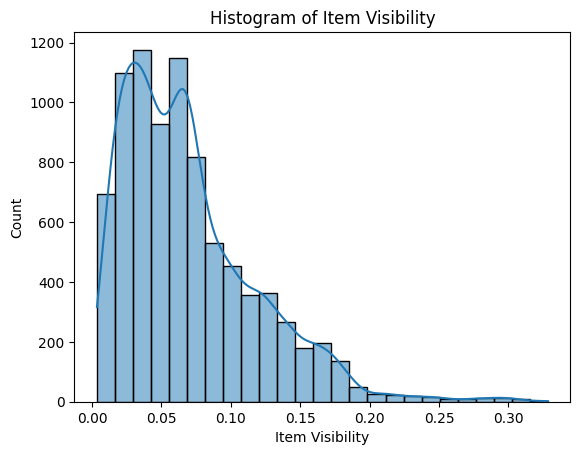

In [33]:
sns.histplot(data=df, x="Item_Visibility", kde=True, bins=25)
plt.title("Histogram of Item Visibility")
plt.xlabel("Item Visibility")

Text(0.5, 0, 'Item')

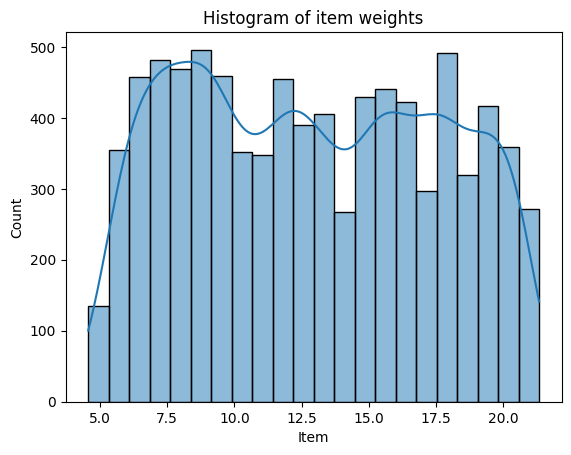

In [34]:
sns.histplot(data=df, x="Item_Weight", kde=True)
plt.title("Histogram of item weights")
plt.xlabel("Item")

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

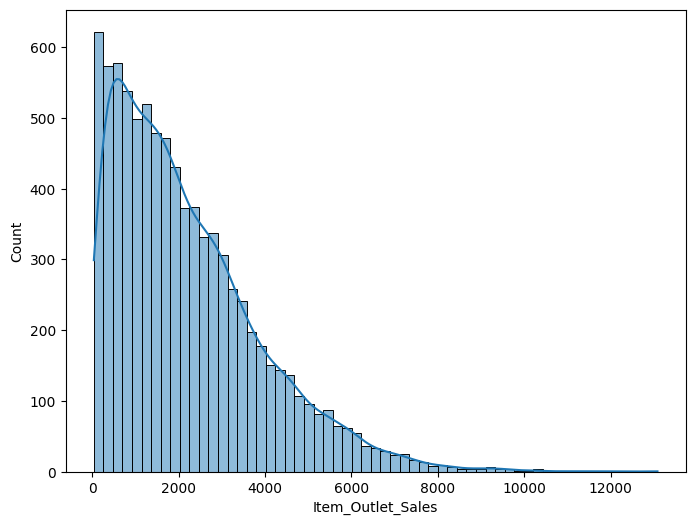

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Item_Outlet_Sales", kde=True)

Text(0.5, 0, 'Item MRP')

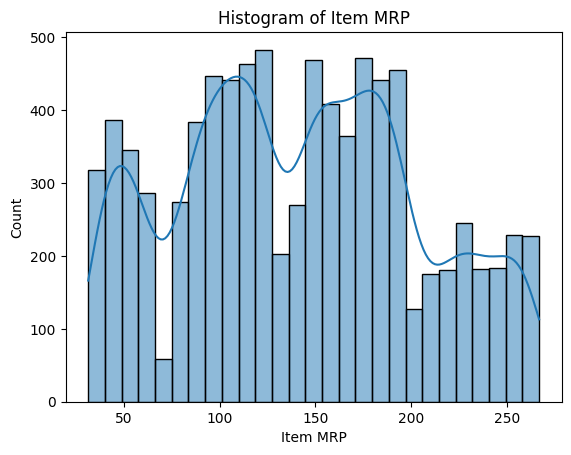

In [36]:
sns.histplot(data=df, x="Item_MRP", kde=True)
plt.title("Histogram of Item MRP")
plt.xlabel("Item MRP")

#### Conclusion:
 - Item visibility and Item Outlet Sales are right skewed.
 - Item weights and Item MRP seem to be multimodal in nature.

#### Hypotheses:
1. Items with higher MRP tend to have lower sales. 
2. Items with higher MRP have lesser quantity sold.
3. Products with low-fat content have higher average sales compared to regular-fat products.
4. Low fat content items have higher MRPs than regular fat content items.
5. Regular fat content products are more visible than low fat content items.
6. Major revenue for all outlets is generated by sale of Fruits and Vegetables.
7. Larger outlets generate higher sales than smaller outlets.
8. Items with higher visibility in the store tend to have higher sales.
9. Super Market Type 1 generates the highest average revenue.
10. Outlets located in Tier 1 cities have higher sales compared to Tier 2 & 3 cities.
11. Heavier items have lesser sales.
12. Items with higher MRP are more visible in outlets.
13. The quantity of products sold by different outlet types is dependent on location type.
14. The item type that generates most revenue varies for different outlet sizes.


#### Hypothesis 1
Items with higher MRP tend to have higher sales.

In [37]:
per_item_sale = df.groupby("Item_Identifier")["Item_Outlet_Sales"].sum().reset_index()
per_item_mrp = df.groupby("Item_Identifier")["Item_MRP"].mean().reset_index()
mrp_sales_comparison_data = pd.concat([per_item_sale, per_item_mrp], axis=1)

mrp_sales_comparison_data

,Item_Identifier,Item_Outlet_Sales,Item_Identifier,Item_MRP
0,DRA12,11061.6012,DRA12,141.865400
1,DRA24,15723.5328,DRA24,164.086800
2,DRA59,20915.4412,DRA59,185.179900
3,DRB01,4554.0720,DRB01,189.586333
4,DRB13,12144.1920,DRB13,189.693000
...,...,...,...,...
1550,NCZ30,12653.5290,NCZ30,120.752657
1551,NCZ41,9137.4392,NCZ41,125.630400
1552,NCZ42,19199.0088,NCZ42,236.644800
1553,NCZ53,15073.7120,NCZ53,188.321400


In [40]:
fig = ex.scatter(
    data_frame=mrp_sales_comparison_data,
    x="Item_MRP",
    y="Item_Outlet_Sales",
    title="Revenue Generated vs Item MRP",
    labels={"Item_Outlet_Sales": "Revenue Generated", "Item_MRP": "Item MRP"},
    trendline="ols",
    trendline_color_override="black",
)
fig.update_traces(marker=dict(color="orange"))

In [ ]:
float(
    mrp_sales_comparison_data["Item_MRP"].corr(
        mrp_sales_comparison_data["Item_Outlet_Sales"]
    )
)

0.7545420893408263

#### Conclusion:
There is a strong positive correlation between the MRP of an item and the monetary value of sales. 

#### Hypothesis 2
Items with higher MRP have lesser quantity sold.

In [ ]:
avg_item_mrp = df.groupby(["Item_Identifier"])["Item_MRP"].mean().reset_index()
per_item_qty_sold = df.groupby(["Item_Identifier"])["Quantity_Sold"].sum().reset_index()
item_mrp_qty_comp = pd.concat([avg_item_mrp, per_item_qty_sold], axis=1)
item_mrp_qty_comp

,Item_Identifier,Item_MRP,Item_Identifier,Quantity_Sold
0,DRA12,141.865400,DRA12,74
1,DRA24,164.086800,DRA24,92
2,DRA59,185.179900,DRA59,109
3,DRB01,189.586333,DRB01,22
4,DRB13,189.693000,DRB13,62
...,...,...,...,...
1550,NCZ30,120.752657,NCZ30,100
1551,NCZ41,125.630400,NCZ41,69
1552,NCZ42,236.644800,NCZ42,80
1553,NCZ53,188.321400,NCZ53,77


In [ ]:
float(item_mrp_qty_comp["Item_MRP"].corr(item_mrp_qty_comp["Quantity_Sold"]))

0.016825181719900963

In [ ]:
fig = ex.scatter(
    data_frame=item_mrp_qty_comp,
    y="Quantity_Sold",
    x="Item_MRP",
    trendline="ols",
    title="Item MRP vs Quantity sold",
    trendline_color_override="yellow",
    labels={"Quantity_Sold": "Quantity Sold", "Item_MRP": "Item MRP"},
)
fig.update_traces(marker=dict(color="purple"))

#### Conclusion
There seems to be no correlation between the MRP of a product and its sales across outlets.

#### Hypothesis 3
Products with low-fat content have higher average sales compared to regular-fat products.

In [ ]:
fat_content_sales = (
    df.groupby("Item_Fat_Content")["Item_Outlet_Sales"].median().reset_index()
)
ex.bar(
    data_frame=fat_content_sales,
    x="Item_Fat_Content",
    y="Item_Outlet_Sales",
    color="Item_Fat_Content",
    title="Average revenue generated by products of different fat content",
    labels={
        "Item_Outlet_Sales": "Average Revenue Generated",
        "Item_Fat_Content": "Fat Content",
    },
    text_auto=True,
)

#### Conclusion:
We observe that products with regular fat content have a marginally higher average revenue generated as compared to items with low fat content.

#### Hypothesis 4
Low fat content items have higher MRPs than regular fat content items.

In [ ]:
fat_content_mrp = (
    df.groupby(["Item_Fat_Content", "Item_Type"])["Item_MRP"].mean().reset_index()
)
ex.line(
    data_frame=fat_content_mrp,
    x="Item_Type",
    y="Item_MRP",
    color="Item_Fat_Content",
    labels={
        "Item_Type": "Product Category",
        "Item_MRP": "Item MRP",
        "Item_Fat_Content": "Item Fat Content",
    },
    title="MRP of different cateogries of products based on Fat Content",
)

#### Conclusion:
In general for the different product categories, regular fat content products tend to have a higher price than low fat content items.

#### Hypothesis 5
Regular fat content products are more visible than low fat content items.

In [ ]:
fat_content_visibility = (
    df.groupby(["Item_Fat_Content"])["Item_Visibility"].median().reset_index()
)
ex.pie(
    data_frame=fat_content_visibility,
    values="Item_Visibility",
    names="Item_Fat_Content",
    title="Visibility of products based on their fat content",
)

#### Conclusion:
Regular fat products are more visible in stores as compared to low fat content products. This could also explain why regular fat content products have a higher average revenue.

#### Hypothesis 6
Major revenue for all outlets is generated by sale of Fruits and Vegetables.

In [ ]:
item_type_sales = (
    df.groupby(["Item_Type", "Outlet_Type"])["Item_Outlet_Sales"].sum().reset_index()
)

ex.bar(
    data_frame=item_type_sales,
    x="Item_Type",
    y="Item_Outlet_Sales",
    title="Sales of different item types in different outlets",
    color="Outlet_Type",
    labels={
        "Item_Outlet_Sales": "Total Revenue Generated",
        "Item_Type": "Item Category",
        "Outlet_Type": "Outlet Type",
    },
)

#### Conclusion:
 - Fruits and Vegetables are the major generators of revenue for Type 1 and Type 3 supermarkets.
 - Snack Foods generate the most revenue for Supermarket Type 2 and Grocery Stores.

#### Hypothesis 7
Larger outlets generate higher sales than smaller outlets.

In [ ]:
avg_sales_per_outlet_size = (
    df.groupby("Outlet_Size")["Item_Outlet_Sales"].median().reset_index()
)

ex.bar(
    data_frame=avg_sales_per_outlet_size,
    y="Outlet_Size",
    x="Item_Outlet_Sales",
    orientation="h",
    color="Outlet_Size",
    title="Average revenue generated by outlets of different sizes",
    labels={
        "Outlet_Size": "Outlet Size",
        "Item_Outlet_Sales": "Average Revenue Generated",
    },
    text_auto=True,
)

#### Conclusion:
The medium size outlets have the highest average revenue generated followed by high sized outlets and small sized outlets.

#### Hypothesis 8
Items with higher visibility in the store tend to have higher sales.

In [ ]:
avg_item_visibility = (
    df.groupby(["Item_Identifier"])["Item_Visibility"].median().reset_index()
)
avg_item_revenue = (
    df.groupby(["Item_Identifier"])["Item_Outlet_Sales"].sum().reset_index()
)
item_rev_vis_comp = pd.concat([avg_item_visibility, avg_item_revenue], axis=1)

item_rev_vis_comp

,Item_Identifier,Item_Visibility,Item_Identifier,Item_Outlet_Sales
0,DRA12,0.052575,DRA12,11061.6012
1,DRA24,0.039990,DRA24,15723.5328
2,DRA59,0.128027,DRA59,20915.4412
3,DRB01,0.082171,DRB01,4554.0720
4,DRB13,0.007055,DRB13,12144.1920
...,...,...,...,...
1550,NCZ30,0.026226,NCZ30,12653.5290
1551,NCZ41,0.064409,NCZ41,9137.4392
1552,NCZ42,0.011305,NCZ42,19199.0088
1553,NCZ53,0.024515,NCZ53,15073.7120


In [ ]:
float(item_rev_vis_comp["Item_Visibility"].corr(item_rev_vis_comp["Item_Outlet_Sales"]))

-0.007711604938419371

In [ ]:
fig = ex.scatter(
    data_frame=item_rev_vis_comp,
    y="Item_Visibility",
    x="Item_Outlet_Sales",
    title="Item visibility vs Item Revenue Generated",
    labels={
        "Item_Visibility": "Item Visibility",
        "Item_Outlet_Sales": "Item Revenue Generated",
    },
    trendline="ols",
    trendline_color_override="red",
)

fig.update_traces(marker=dict(color="gray"))

#### Conclusion:
There appears to be no correlation between item visibility and the revenue it generates.

#### Hypothesis 9
Super Market Type 1 generates the highest average revenue.

In [ ]:
location_wise_average_sales = (
    df.groupby(["Outlet_Type"])["Item_Outlet_Sales"].median().reset_index()
)
ex.pie(
    data_frame=location_wise_average_sales,
    values="Item_Outlet_Sales",
    names="Outlet_Type",
    title="Average Revenue Generated by different Outlet Types",
    labels={"Item_Outlet_Sales": "Average Sales", "Outlet_Type": "Outlet Type"},
    color_discrete_sequence=ex.colors.qualitative.Pastel,
)

#### Conclusion:
Super Market Type 3 outlets contribute the greatest to the revenue of Big Mart.

#### Hypothesis 10
Outlets located in Tier 1 cities have higher sales compared to Tier 2 & 3 cities.

In [ ]:
location_sales = (
    df.groupby(["Outlet_Location_Type"])["Item_Outlet_Sales"].median().reset_index()
)
location_sales

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,1488.063
1,Tier 2,2004.058
2,Tier 3,1810.976


In [ ]:
ex.bar(
    data_frame=location_sales,
    x="Item_Outlet_Sales",
    y="Outlet_Location_Type",
    color="Outlet_Location_Type",
    text_auto=True,
    title="Average Revenue generated in different location types",
    labels={
        "Outlet_Location_Type": "Location Type",
        "Item_Outlet_Sales": "Revenue Generated",
    },
)

#### Hypothesis 11
Heavier items have lesser sales.

In [ ]:
avg_item_weight = df.groupby(["Item_Identifier"])["Item_Weight"].mean().reset_index()
avg_item_revenue = (
    df.groupby(["Item_Identifier"])["Item_Outlet_Sales"].sum().reset_index()
)
item_rev_weight_comp = pd.concat([avg_item_weight, avg_item_revenue], axis=1)

item_rev_weight_comp

,Item_Identifier,Item_Weight,Item_Identifier,Item_Outlet_Sales
0,DRA12,11.600,DRA12,11061.6012
1,DRA24,19.350,DRA24,15723.5328
2,DRA59,8.270,DRA59,20915.4412
3,DRB01,7.390,DRB01,4554.0720
4,DRB13,6.115,DRB13,12144.1920
...,...,...,...,...
1550,NCZ30,6.590,NCZ30,12653.5290
1551,NCZ41,19.850,NCZ41,9137.4392
1552,NCZ42,10.500,NCZ42,19199.0088
1553,NCZ53,9.600,NCZ53,15073.7120


In [ ]:
float(
    item_rev_weight_comp["Item_Weight"].corr(item_rev_weight_comp["Item_Outlet_Sales"])
)

0.04194645825350132

In [ ]:
fig = ex.scatter(
    data_frame=item_rev_weight_comp,
    y="Item_Weight",
    x="Item_Outlet_Sales",
    title="Item weight vs Item Revenue Generated",
    labels={
        "Item_Weight": "Item Weight",
        "Item_Outlet_Sales": "Item Revenue Generated",
    },
    trendline="ols",
    trendline_color_override="cyan",
)

fig.update_traces(marker=dict(color="black"))

#### Conclusion:
There is negligible correlation between the weight of an item and the amount of revenue it generates.

#### Hypothesis 12
Items with higher MRP are more visible in outlets.

In [ ]:
avg_item_mrp

,Item_Identifier,Item_MRP
0,DRA12,141.865400
1,DRA24,164.086800
2,DRA59,185.179900
3,DRB01,189.586333
4,DRB13,189.693000
...,...,...
1550,NCZ30,120.752657
1551,NCZ41,125.630400
1552,NCZ42,236.644800
1553,NCZ53,188.321400


In [ ]:
item_mrp_vis_comp = pd.concat([avg_item_mrp, avg_item_visibility], axis=1)

In [ ]:
float(item_mrp_vis_comp["Item_MRP"].corr(item_mrp_vis_comp["Item_Visibility"]))

-0.009947235930874479

In [ ]:
fig = ex.scatter(
    data_frame=item_mrp_vis_comp,
    y="Item_Visibility",
    x="Item_MRP",
    title="Item Visibility vs Item MRP",
    labels={"Item_Visibility": "Visibility of item", "Item_MRP": "Item MRP"},
    trendline="ols",
    trendline_color_override="yellow",
)

fig.update_traces(marker=dict(color="green"))

#### Conclusion
There is no correlation between the MRP of an item and it's visibility in an outlet.

#### Hypothesis 13
The average revenue generated by different outlet types is dependent on location type

In [ ]:
item_location_outlet_sales = (
    df.groupby(["Outlet_Location_Type", "Outlet_Type"])["Item_Outlet_Sales"]
    .median()
    .reset_index()
)
item_location_outlet_sales

,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Tier 1,Grocery Store,265.6542
1,Tier 1,Supermarket Type1,1958.7836
2,Tier 2,Supermarket Type1,2004.0580
3,Tier 3,Grocery Store,250.3408
4,Tier 3,Supermarket Type1,2050.6640
5,Tier 3,Supermarket Type2,1655.1788
6,Tier 3,Supermarket Type3,3364.9532


In [ ]:
ex.bar(
    data_frame=item_location_outlet_sales,
    x="Outlet_Type",
    y="Item_Outlet_Sales",
    color="Outlet_Location_Type",
    title="Importance of Outlet Type in different locations",
    labels={
        "Item_Outlet_Sales": "Average Revenue Generated",
        "Outlet_Type": "Outlet Type",
        "Outlet_Location_Type": "Outlet Location Type",
    },
)

#### Conclusion
 - Tier 1 cities only have either a grocery store or a Super Market Type 1. Amongst these 2, Super Market Type 1 generates a much higher average revenue.
 - Tier 2 cities only have outlets of the type Super Market Type 1.
 - Super Market Type 3 generates the greatest average revenue for Big Mart in Tier 3 cities.

#### Hypothesis 14
The item type that generates most revenue varies for different outlet sizes.

In [ ]:
item_type_outlet_size_sales = (
    df.groupby(["Outlet_Size", "Item_Type"])["Item_Outlet_Sales"].median().reset_index()
)
item_type_outlet_size_sales

ex.line(
    data_frame=item_type_outlet_size_sales,
    y="Item_Outlet_Sales",
    x="Item_Type",
    color="Outlet_Size",
    labels={
        "Item_Outlet_Sales": "Average Revenue",
        "Item_Type": "Item Type",
        "Outlet_Size": "Outlet Size",
    },
    title="Sales of different categories of products in different outlet sizes",
)

#### Conclusion
 - In 'High' sized outlets, Household items generate the largest revenue on average.
 - In 'Medium' sized outlets, Snack Foods generate the largest revenue on average.
 - In 'Small' sized outlets, Seafood generates the highest average revenue.

#### Model Making

#### Label Encoding
 - Item_Fat_Content
 - Outlet_Establishment_Year
 - Outlet_Size

In [ ]:
df = df.iloc[:, [12, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11]]

In [ ]:
df

,primary key,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049FDA15,9.300,LF,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,OUT018DRC01,5.920,reg,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,OUT049FDN15,17.500,LF,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,OUT010FDX07,19.200,reg,0.068513,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,OUT013NCD19,8.930,LF,0.061322,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,OUT013FDF22,6.865,LF,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,OUT045FDS36,8.380,reg,0.046982,Baking Goods,108.1570,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,OUT035NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,OUT018FDN46,7.210,reg,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Item_Fat_Content"] = le.fit_transform(df["Item_Fat_Content"])
df["Outlet_Size"] = le.fit_transform(df["Outlet_Size"])

C:\Users\User4yxh\AppData\Local\Temp\ipykernel_23728\3054610495.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User4yxh\AppData\Local\Temp\ipykernel_23728\3054610495.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df["Outlet_Establishment_Year"] = le.fit_transform(df["Outlet_Establishment_Year"])

C:\Users\User4yxh\AppData\Local\Temp\ipykernel_23728\1314700576.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df

,primary key,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049FDA15,9.300,0,0.016047,Dairy,249.8092,4,1,Tier 1,Supermarket Type1,3735.1380
1,OUT018DRC01,5.920,1,0.019278,Soft Drinks,48.2692,8,1,Tier 3,Supermarket Type2,443.4228
2,OUT049FDN15,17.500,0,0.016760,Meat,141.6180,4,1,Tier 1,Supermarket Type1,2097.2700
3,OUT010FDX07,19.200,1,0.068513,Fruits and Vegetables,182.0950,3,2,Tier 3,Grocery Store,732.3800
4,OUT013NCD19,8.930,0,0.061322,Household,53.8614,1,0,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,OUT013FDF22,6.865,0,0.056783,Snack Foods,214.5218,1,0,Tier 3,Supermarket Type1,2778.3834
8519,OUT045FDS36,8.380,1,0.046982,Baking Goods,108.1570,5,2,Tier 2,Supermarket Type1,549.2850
8520,OUT035NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,6,2,Tier 2,Supermarket Type1,1193.1136
8521,OUT018FDN46,7.210,1,0.145221,Snack Foods,103.1332,8,1,Tier 3,Supermarket Type2,1845.5976


#### Separating the independent variable from the dependent variables

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X

array([['OUT049FDA15', 9.3, 0, ..., 1, 'Tier 1', 'Supermarket Type1'],
       ['OUT018DRC01', 5.92, 1, ..., 1, 'Tier 3', 'Supermarket Type2'],
       ['OUT049FDN15', 17.5, 0, ..., 1, 'Tier 1', 'Supermarket Type1'],
       ...,
       ['OUT035NCJ29', 10.6, 0, ..., 2, 'Tier 2', 'Supermarket Type1'],
       ['OUT018FDN46', 7.21, 1, ..., 1, 'Tier 3', 'Supermarket Type2'],
       ['OUT046DRG01', 14.8, 0, ..., 2, 'Tier 1', 'Supermarket Type1']],
      dtype=object)

In [ ]:
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

#### One Hot Encoding
 - Outlet_Location_Type
 - Outlet_Type

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [8, 9])], remainder="passthrough"
)

In [ ]:
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 249.8092 4 1]
 [0.0 0.0 1.0 ... 48.2692 8 1]
 [1.0 0.0 0.0 ... 141.618 4 1]
 ...
 [0.0 1.0 0.0 ... 85.1224 6 2]
 [0.0 0.0 1.0 ... 103.1332 8 1]
 [1.0 0.0 0.0 ... 75.467 2 2]]


In [ ]:
X.shape

(8519, 15)